In [1]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy.linalg as la
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

NBA_2018= pd.read_csv("C:/Users/rober/Dropbox/Masters Program/NBA/Cluster Project/AllStats.csv", encoding="ISO-8859-1")
NBA_2018.columns.tolist()

['Unnamed: 0',
 'X',
 'player.x',
 'pos.x',
 'age.x',
 'tm.x',
 'g.x',
 'mp.x',
 'per',
 'tspercent',
 'x3par',
 'ftr',
 'orbpercent',
 'drbpercent',
 'trbpercent',
 'astpercent',
 'stlpercent',
 'blkpercent',
 'tovpercent',
 'usgpercent',
 'ows',
 'dws',
 'ws',
 'obpm',
 'dbpm',
 'bpm',
 'vorp',
 'mp.y',
 'fg',
 'fga',
 'fgpercent',
 'x3p',
 'x3pa',
 'x3ppercent',
 'x2p',
 'x2pa',
 'x2ppercent',
 'efgpercent',
 'ftpercent',
 'pts',
 'FGM_0_5',
 'FGA_0_5',
 'FGP_0_5',
 'FGM_5_9',
 'FGA_5_9',
 'FGP_5_9',
 'FGM_10_14',
 'FGA_10_14',
 'FGP_10_14',
 'FGM_15_19',
 'FGA_15_19',
 'FGP_15_19',
 'FGM_20_24',
 'FGA_20_24',
 'FGP_20_24',
 'FGM_25_29',
 'FGA_25_29',
 'FGP_25_29']

In [2]:
NBA_2018.head()

,Unnamed: 0,X,player.x,pos.x,age.x,tm.x,g.x,mp.x,per,tspercent,...,FGP_10_14,FGM_15_19,FGA_15_19,FGP_15_19,FGM_20_24,FGA_20_24,FGP_20_24,FGM_25_29,FGA_25_29,FGP_25_29
0,1,1,Álex Abrines,SG,24,OKC,75,1134,9.0,0.567,...,62.5,0.0,0.1,0.0,0.5,1.5,36.8,0.6,1.6,39.3
1,2,2,Quincy Acy,PF,27,BRK,70,1359,8.2,0.525,...,20.0,0.1,0.2,45.5,0.7,2.1,34.5,0.8,2.2,34.9
2,3,3,Steven Adams,C,24,OKC,76,2487,20.6,0.630,...,52.8,0.0,0.1,20.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,4,Bam Adebayo,C,20,MIA,69,1368,15.7,0.570,...,26.9,0.1,0.2,33.3,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5,Arron Afflalo,SG,32,ORL,53,682,5.8,0.516,...,30.0,0.2,0.5,35.7,0.3,0.9,34.0,0.2,0.5,41.4


In [3]:
##creating df with player name, position, and team to attached to clusters at the end 
Player_Name=NBA_2018[["X","player.x","pos.x","tm.x"]]

In [4]:
##viewing the Player Name dataframe created above
Player_Name

,X,player.x,pos.x,tm.x
0,1,Álex Abrines,SG,OKC
1,2,Quincy Acy,PF,BRK
2,3,Steven Adams,C,OKC
3,4,Bam Adebayo,C,MIA
4,5,Arron Afflalo,SG,ORL
5,6,LaMarcus Aldridge,C,SAS
6,7,Jarrett Allen,C,BRK
7,8,Al-Farouq Aminu,PF,POR
8,9,Justin Anderson,SF,PHI
9,10,Kyle Anderson,SF,SAS


In [5]:
### filtering the df to only include  the columns I want to include in the analysis
Use=NBA_2018[['g.x','mp.x','per','tspercent','x3par',
 'ftr',
 'orbpercent',
 'drbpercent',
 'trbpercent',
 'astpercent',
 'stlpercent',
 'blkpercent',
 'tovpercent',
 'usgpercent',
 'ows',
 'dws',
 'ws',
 'obpm',
 'dbpm',
 'bpm',
 'vorp',
 'fga',
 'fgpercent',
 'x3pa',
 'x3ppercent',
 'x2pa',
 'x2ppercent',
 'efgpercent',
 'ftpercent',
 'FGA_0_5',
 'FGP_0_5',
 'FGA_5_9',
 'FGP_5_9',
 'FGA_10_14',
 'FGP_10_14',
 'FGA_15_19',
 'FGP_15_19',
 'FGA_20_24',
 'FGP_20_24',
 'FGA_25_29',
 'FGP_25_29']]


In [6]:
### looking at descriptive statisitcs for the above variables
Use.describe()

,g.x,mp.x,per,tspercent,x3par,ftr,orbpercent,drbpercent,trbpercent,astpercent,...,FGA_5_9,FGP_5_9,FGA_10_14,FGP_10_14,FGA_15_19,FGP_15_19,FGA_20_24,FGP_20_24,FGA_25_29,FGP_25_29
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,...,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,65.672316,1588.129944,14.458757,0.553997,0.333347,0.247025,4.650282,15.574011,10.111017,14.242655,...,0.829944,37.059322,0.748588,39.638136,0.870904,36.688136,1.388136,35.692655,1.735593,30.513842
std,13.864172,642.565886,4.519382,0.047552,0.204039,0.110454,3.672802,6.397353,4.725078,8.952827,...,0.614699,12.439865,0.676360,12.914806,0.789826,13.287218,0.885243,13.298035,1.490529,13.385306
min,30.000000,359.000000,4.600000,0.417000,0.000000,0.047000,0.500000,4.200000,3.400000,2.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,1060.500000,11.400000,0.525000,0.194250,0.164000,1.900000,10.600000,6.400000,7.800000,...,0.400000,30.650000,0.300000,33.825000,0.300000,31.925000,0.725000,32.425000,0.500000,28.150000
50%,69.500000,1605.500000,14.100000,0.553000,0.354000,0.236000,3.100000,14.200000,8.700000,10.900000,...,0.700000,37.500000,0.600000,40.900000,0.600000,38.750000,1.400000,37.600000,1.500000,34.700000
75%,77.000000,2051.250000,16.975000,0.586000,0.464750,0.310750,6.775000,19.175000,13.100000,18.700000,...,1.100000,44.300000,1.000000,47.100000,1.275000,44.675000,1.975000,41.300000,2.600000,37.600000
max,82.000000,3026.000000,29.800000,0.675000,0.827000,0.673000,16.700000,37.600000,26.500000,49.800000,...,2.800000,100.000000,4.100000,100.000000,4.000000,100.000000,4.000000,100.000000,7.800000,100.000000


In [6]:
### creating z score for all column variables to standardize them for the PCA and cluster analysis 
def z_score(df):
        df.columns = [x + "_zscore" for x in df.columns.tolist()]
        return ((df - df.mean())/df.std(ddof=0))

In [7]:
ZData=z_score(Use)

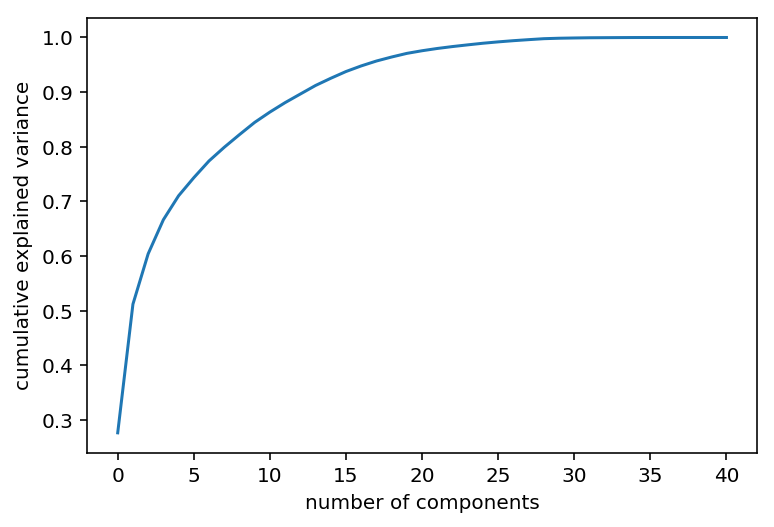

In [8]:
###Exploratory PCA Analysis 
#plot to see how many components to retain 
pca = PCA().fit(ZData)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


##shows we should keep around 8 components

In [9]:
##printing combined variance explained to verify how many components we need
### 8 get almost 80% variances explained (79.9%)

covar_matrix = PCA(n_components = 41) #we have 41 variables
covar_matrix.fit(ZData)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([27.7, 51.2, 60.4, 66.6, 71. , 74.3, 77.4, 79.9, 82.2, 84.4, 86.3,
       88. , 89.6, 91.2, 92.5, 93.7, 94.7, 95.6, 96.3, 97. , 97.5, 97.9,
       98.3, 98.6, 98.9, 99.1, 99.3, 99.5, 99.7, 99.8, 99.8, 99.8, 99.8,
       99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8, 99.8])

In [10]:
##selecting 8 components and telling the PCA to retain 8 components 
pca = PCA(n_components=8, svd_solver='full')
pca.fit(ZData)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [11]:
##t is the df with the 8 components
T = pca.transform(ZData)

In [13]:
### showing the shape and variables used in the origianl df
## it is 354 rows and 41 columns because it includes all of the variabes 
ZData.shape

(354, 41)

In [12]:
##checking t shape to ensure it retained the 8 components
T.shape
##it is 354 rows and 8 colummns (1 column for each component)

(354, 8)

In [13]:
##figuring out what the components represent (good long shooters, good defenders, good rim protectors etc)
components = pd.DataFrame(pca.components_, columns = ZData.columns, index=[0,1, 2,3,4,5,6,7])
components

,g.x_zscore,mp.x_zscore,per_zscore,tspercent_zscore,x3par_zscore,ftr_zscore,orbpercent_zscore,drbpercent_zscore,trbpercent_zscore,astpercent_zscore,...,FGA_5_9_zscore,FGP_5_9_zscore,FGA_10_14_zscore,FGP_10_14_zscore,FGA_15_19_zscore,FGP_15_19_zscore,FGA_20_24_zscore,FGP_20_24_zscore,FGA_25_29_zscore,FGP_25_29_zscore
0,0.094707,0.174016,0.276630,0.183232,-0.141385,0.157773,0.141423,0.163394,0.166831,0.074612,...,0.172952,0.071791,0.134766,0.040782,0.106109,0.039956,-0.010243,-0.036299,0.044219,-0.038393
1,-0.064374,-0.168907,-0.022084,0.061526,-0.198013,0.126012,0.243610,0.167785,0.208345,-0.145025,...,-0.068982,0.037918,-0.160309,-0.029837,-0.195093,-0.111274,-0.271906,-0.127630,-0.266543,-0.212361
2,0.083493,-0.006373,-0.005221,0.346993,0.233217,-0.091802,-0.035336,-0.052041,-0.045710,-0.187318,...,-0.248514,-0.003526,-0.227838,0.099361,-0.187737,0.036050,0.081881,0.136613,0.090406,0.093534
3,0.194069,0.150983,-0.082106,-0.103067,0.149338,0.045291,-0.048098,-0.001772,-0.019932,0.064677,...,-0.170024,-0.229101,-0.206652,-0.295349,-0.179824,-0.235808,0.062068,-0.094009,0.048711,0.030591
4,-0.365758,-0.271116,0.124097,0.086265,-0.052818,0.111737,-0.094097,-0.172280,-0.149021,0.471711,...,-0.131117,0.019534,-0.063676,0.096675,-0.030290,0.047637,-0.126606,0.104943,0.034376,-0.056124
5,-0.451431,-0.257965,0.136447,0.025857,0.149753,0.195501,0.158925,0.302487,0.264983,-0.103477,...,-0.053336,-0.220684,-0.110093,-0.192445,-0.114587,-0.125246,0.066984,0.020792,0.234916,0.131674
6,-0.069461,-0.104795,0.028764,-0.051046,-0.015601,-0.213579,-0.011336,0.190723,0.125710,-0.017129,...,0.062270,0.226691,0.119721,0.082973,0.100077,0.201378,-0.054669,0.353110,-0.123679,0.373413
7,0.031364,0.111175,-0.059100,0.085940,-0.065477,0.097185,-0.076356,-0.198011,-0.163791,0.040252,...,0.130147,0.114081,-0.032223,-0.411909,-0.035749,-0.407517,0.014710,0.274441,-0.064243,0.208421


In [14]:
##saving the components to a csv for quick review and analysis 
components.to_csv("components.csv")

In [15]:
##creating a dataframe to look at player component scores 
player_components=pd.DataFrame(T)

In [16]:
##viewing the player component scores
player_components

,0,1,2,3,4,5,6,7
0,-4.202188,-0.627285,2.794161,0.916386,-0.795864,-0.181110,-0.675491,-0.393456
1,-4.762269,-0.925170,0.600991,2.494341,-1.426997,1.987561,-0.352358,-1.325681
2,7.095598,5.076816,0.562053,0.364822,-0.368112,-1.928735,-3.167896,0.112860
3,1.427089,5.166473,-1.470890,0.884163,-0.358789,0.132268,-2.661728,-1.355178
4,-5.901546,0.614333,0.380038,-1.501045,-0.921260,0.001690,0.383636,0.572921
5,8.303639,-2.317920,-2.615249,-2.854602,-2.299905,-0.881263,0.377501,-0.088729
6,2.323417,4.937043,1.402622,-0.702837,-0.191502,0.004764,-0.443906,1.167521
7,-0.802898,-0.603232,0.413037,3.800871,-2.108958,1.515865,0.544629,0.143374
8,-2.959290,0.474127,1.249873,-0.683475,0.228225,2.252557,-0.615777,-1.338244
9,2.966080,2.112788,0.490596,2.593930,0.931290,-2.148246,2.247136,-0.492341


In [17]:
### joining the dataframes to see each players component scores with their name, position, and team 
Player_Name_Components=pd.merge(player_components,
                                Player_Name[['player.x','pos.x','tm.x']], how = 'inner', 
                                right_index = True, 
                                left_index = True)

In [18]:
###viewing the components when they are linked to the player name, position, and team 
Player_Name_Components

,0,1,2,3,4,5,6,7,player.x,pos.x,tm.x
0,-4.202188,-0.627285,2.794161,0.916386,-0.795864,-0.181110,-0.675491,-0.393456,Álex Abrines,SG,OKC
1,-4.762269,-0.925170,0.600991,2.494341,-1.426997,1.987561,-0.352358,-1.325681,Quincy Acy,PF,BRK
2,7.095598,5.076816,0.562053,0.364822,-0.368112,-1.928735,-3.167896,0.112860,Steven Adams,C,OKC
3,1.427089,5.166473,-1.470890,0.884163,-0.358789,0.132268,-2.661728,-1.355178,Bam Adebayo,C,MIA
4,-5.901546,0.614333,0.380038,-1.501045,-0.921260,0.001690,0.383636,0.572921,Arron Afflalo,SG,ORL
5,8.303639,-2.317920,-2.615249,-2.854602,-2.299905,-0.881263,0.377501,-0.088729,LaMarcus Aldridge,C,SAS
6,2.323417,4.937043,1.402622,-0.702837,-0.191502,0.004764,-0.443906,1.167521,Jarrett Allen,C,BRK
7,-0.802898,-0.603232,0.413037,3.800871,-2.108958,1.515865,0.544629,0.143374,Al-Farouq Aminu,PF,POR
8,-2.959290,0.474127,1.249873,-0.683475,0.228225,2.252557,-0.615777,-1.338244,Justin Anderson,SF,PHI
9,2.966080,2.112788,0.490596,2.593930,0.931290,-2.148246,2.247136,-0.492341,Kyle Anderson,SF,SAS


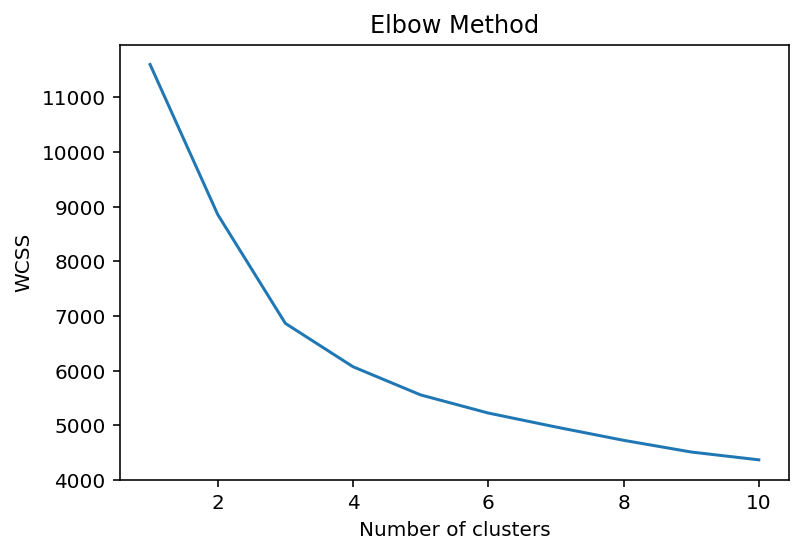

In [19]:
###determining how many clusters to have based on the components we retained
##using the 'elbow method'
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(player_components)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


##using 5 clusters because that is where the the 'elbow' appears 


In [20]:
###defining 5 clusters 
###using 10,000 interations for the k means clustering algorithm 
## the clusters are stable at 10000 iterations
## then printing the cluster labels 
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 10000, random_state=3425)
k_means.fit(player_components)
labels = k_means.labels_
print(labels)

[0 3 2 2 3 4 2 0 3 2 0 4 1 0 0 0 3 3 1 1 1 1 3 2 1 4 1 2 3 0 2 2 0 2 0 0 1
 0 0 1 3 0 1 3 4 0 0 2 1 3 3 3 2 1 0 3 2 0 3 0 2 3 3 1 0 0 4 0 0 3 0 4 0 4
 2 2 2 3 3 3 4 2 0 1 3 3 1 2 3 1 4 0 4 3 3 1 2 2 2 3 0 0 0 1 3 3 3 1 1 1 4
 2 0 2 1 0 2 3 2 0 0 1 0 1 0 1 4 0 2 1 0 3 0 2 0 1 2 4 0 1 2 1 2 3 1 0 0 1
 4 3 3 3 0 1 4 2 0 2 1 3 0 3 4 0 2 0 1 2 0 2 0 0 2 1 3 1 3 0 2 1 4 3 2 1 1
 1 4 3 0 3 2 3 1 3 3 0 0 3 1 0 3 0 2 1 0 0 0 1 1 3 0 2 1 1 2 1 1 0 3 0 3 2
 1 3 2 3 3 3 2 3 4 1 0 0 2 1 3 0 0 4 2 2 2 1 1 1 2 3 2 2 1 0 1 1 2 3 1 1 1
 2 1 0 1 0 0 3 2 4 1 3 3 1 1 0 0 3 3 1 3 1 0 0 3 2 3 1 2 3 0 4 0 0 1 2 3 2
 0 0 1 3 4 1 3 1 1 2 4 2 1 3 1 0 3 0 3 0 1 2 3 0 0 1 2 3 3 1 0 0 0 0 1 0 1
 2 0 1 0 3 3 3 3 0 1 2 3 2 3 1 2 3 3 3 1 2]


In [21]:
### using the player name components df, attaching the cluster numbers to each line
Player_Name_Components["Clus_km"]=labels
Player_Name_Components.head(5)

,0,1,2,3,4,5,6,7,player.x,pos.x,tm.x,Clus_km
0,-4.202188,-0.627285,2.794161,0.916386,-0.795864,-0.181110,-0.675491,-0.393456,Álex Abrines,SG,OKC,0
1,-4.762269,-0.925170,0.600991,2.494341,-1.426997,1.987561,-0.352358,-1.325681,Quincy Acy,PF,BRK,3
2,7.095598,5.076816,0.562053,0.364822,-0.368112,-1.928735,-3.167896,0.112860,Steven Adams,C,OKC,2
3,1.427089,5.166473,-1.470890,0.884163,-0.358789,0.132268,-2.661728,-1.355178,Bam Adebayo,C,MIA,2
4,-5.901546,0.614333,0.380038,-1.501045,-0.921260,0.001690,0.383636,0.572921,Arron Afflalo,SG,ORL,3


In [22]:
##writting the dataframe with players, team, postions, 
##component scoresm and cluster number to a csv for easy anaysis and reference
Player_Name_Components.to_csv("Player_Clusters_new.csv")

In [23]:
##looking at centroids of the clusters 
Player_Name_Components.groupby('Clus_km').mean()

,0,1,2,3,4,5,6,7
Clus_km,,,,,,,,
0,-1.451766,-0.988081,1.801397,0.212073,-0.283878,-0.295558,0.014468,0.078848
1,1.300288,-2.024391,-0.845440,-0.436199,-0.267878,0.042586,0.171668,0.210246
2,2.407541,4.879459,0.188126,-0.273573,0.054829,0.047594,-0.253699,-0.092344
3,-3.646311,0.251733,-1.166274,0.253756,0.278255,0.179175,0.029104,-0.141729
4,7.052574,-3.759327,-0.313557,0.608330,0.896095,0.212718,-0.047715,-0.283271


Text(0,0.5,'PCA 2')

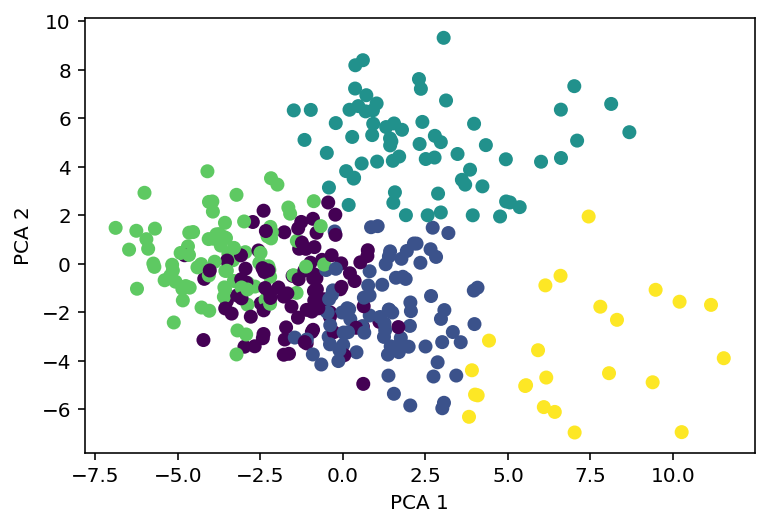

In [24]:
### plotting the first and second component in 2d space
### having the cluster colors be separated by the cluster labels determined above

plot=plt.scatter(player_components[0], player_components[1], c=labels)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')



Text(0,0.5,'PCA 1')

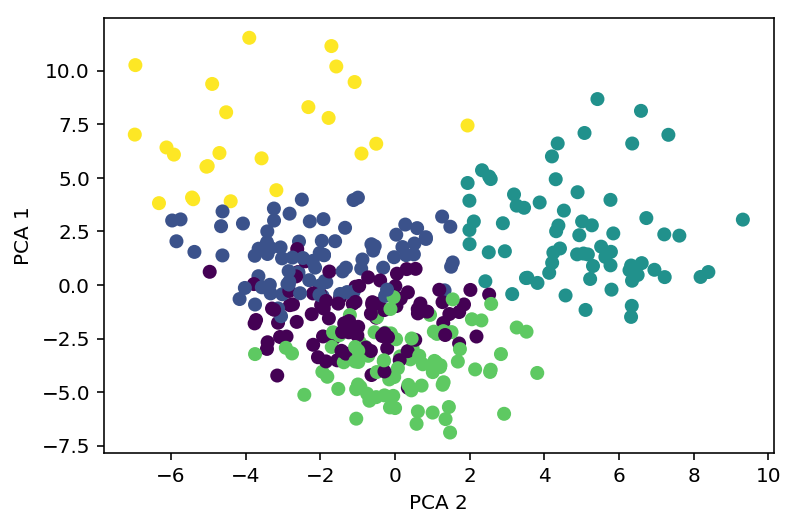

In [25]:
##plotting the first two components with the x and y axis flipped 
plt.scatter(player_components[1],player_components[0], c=labels)
plt.xlabel('PCA 2')
plt.ylabel('PCA 1')

Text(0,0.5,'PCA 3')

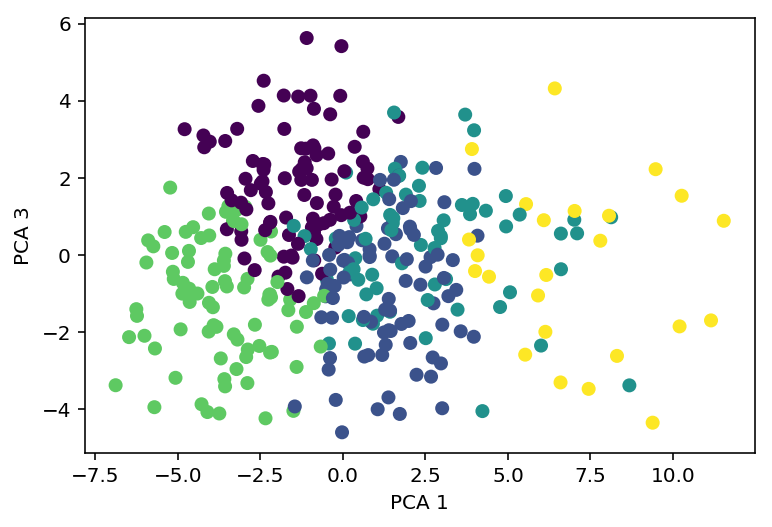

In [27]:
##plotting components 1 and 3 to visualize 
plt.scatter(player_components[0],player_components[2], c=labels)
plt.xlabel('PCA 1')
plt.ylabel('PCA 3')

##ax.legend()

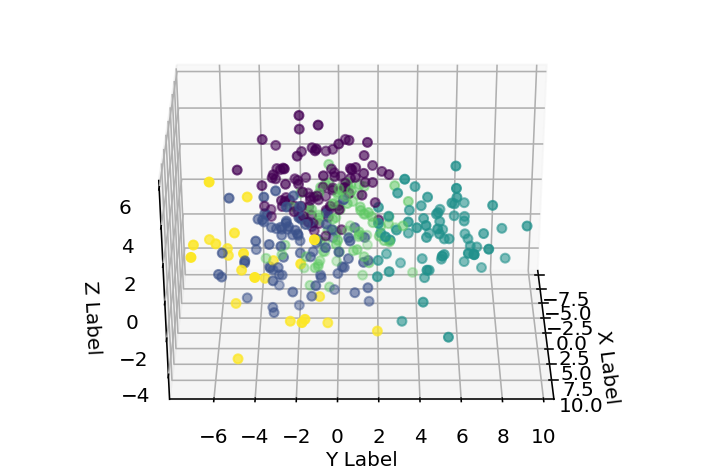

In [29]:
###plotting first 3 components in 3D space 

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =player_components[0]
y =player_components[1]
z =player_components[2]

ax.scatter(x, y, z, c=labels, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

for i in range(0, 360, 45):
    ax.view_init(None, i)
    plt.show()


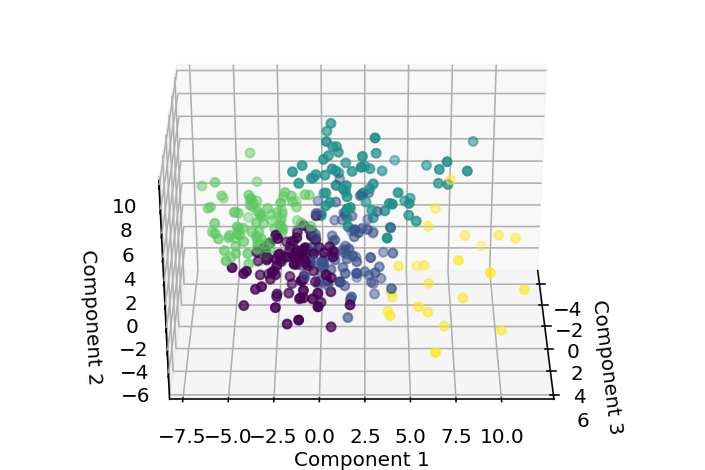

In [30]:
##plotting the first 3 components but rotating the first 3 to different axes to visualize the relationship
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =player_components[2]
y =player_components[0]
z =player_components[1]

ax.scatter(x, y, z, c=labels, marker='o')

ax.set_xlabel('Component 3') ###x 
ax.set_ylabel('Component 1') ###y
ax.set_zlabel('Component 2') ###z

for i in range(0, 360, 45):
    ax.view_init(None, i)
    plt.show()

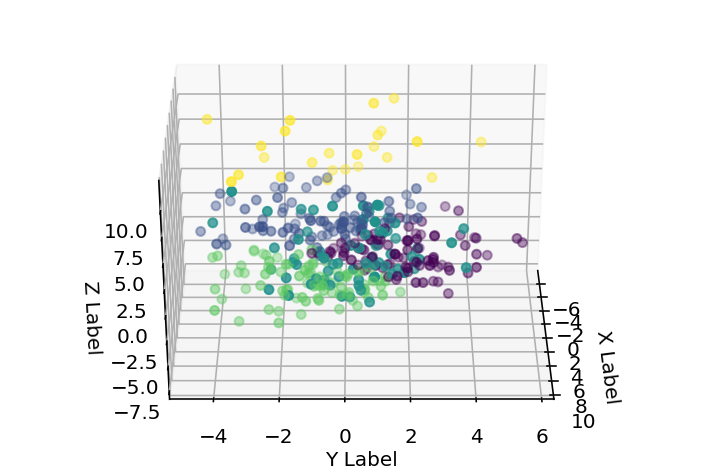

In [31]:
##rotating and plotting the first 3 components again in 3d space

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =player_components[1]
y =player_components[2]
z =player_components[0]

ax.scatter(x, y, z, c=labels, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

for i in range(0, 360, 45):
    ax.view_init(None, i)
    plt.show()

In [32]:
### getting important features in order
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print ("Features by importance:\n", important_features)

##get_important_features(T, pca.components_, ZData.columns.values)
get_important_features(T, player_components, ZData.columns.values)

Features by importance:
 [(118.60548497888374, 'blkpercent_zscore'), (98.22105872505111, 'ftr_zscore'), (94.55880092489674, 'per_zscore'), (76.3828723263418, 'FGA_10_14_zscore'), (68.33926362976399, 'x3par_zscore'), (68.31695962671765, 'x2pa_zscore'), (67.08748100926545, 'ws_zscore'), (61.156017852080716, 'efgpercent_zscore'), (60.797966832558394, 'FGP_0_5_zscore'), (59.85512234929327, 'FGA_5_9_zscore'), (59.37936052779621, 'FGP_15_19_zscore'), (55.62474536174922, 'mp.x_zscore'), (54.5884745655394, 'FGP_25_29_zscore'), (53.24215637905939, 'orbpercent_zscore'), (50.87569694411486, 'tspercent_zscore'), (49.5751367215697, 'ftpercent_zscore'), (48.84085719252143, 'g.x_zscore'), (47.105927869915504, 'fgpercent_zscore'), (39.490029156932835, 'tovpercent_zscore'), (39.483412300426494, 'astpercent_zscore'), (35.91609006873035, 'bpm_zscore'), (34.432402098271474, 'trbpercent_zscore'), (33.48326254015746, 'vorp_zscore'), (29.664394343518616, 'x3pa_zscore'), (28.37748961439897, 'FGP_10_14_zscore'

In [33]:
%matplotlib inline
plt.style.use('ggplot')

def draw_vectors(transformed_features, components_, columns):
    """
    This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling
    """

    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()

    for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

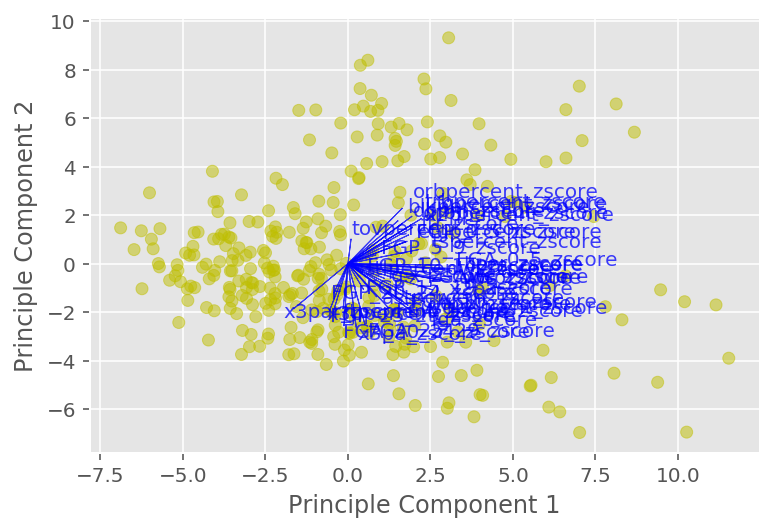

In [34]:
###plotting direction of the variables 

ax = draw_vectors(T, pca.components_, ZData.columns.values)
T_df = pd.DataFrame(T)
T_df.columns = ['component1', 'component2','component3','component4','component5','component6','component7','component8']

T_df['color'] = 'y'
T_df.loc[T_df['component1'] > 125, 'color'] = 'g'
T_df.loc[T_df['component2'] > 125, 'color'] = 'r'
T_df.loc[T_df['component3'] > 125, 'color'] = 'b'
T_df.loc[T_df['component4'] > 125, 'color'] = 'y'
T_df.loc[T_df['component5'] > 125, 'color'] = 'p'
T_df.loc[T_df['component6'] > 125, 'color'] = 'i'
T_df.loc[T_df['component7'] > 125, 'color'] = 'o'
T_df.loc[T_df['component7'] > 125, 'color'] = 'w'
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(T_df['component1'], T_df['component2'], color=T_df['color'], alpha=0.5)
plt.show()

#### not very helpful as there are a lot of variables to plot